## Project Work

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import gradio as gr
from torchvision import models
from torchvision.transforms import Compose, Resize, ToTensor
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader


In [26]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## 3. Preparing the Dataset and Data Loaders

In this block, we define the necessary transformations for our dataset, load the data, and create data loaders for training and validation.

### Transformations
- **`Compose()`**: We use `Compose` to apply a series of transformations to the images.
    - **`Resize((28, 28))`**: This resizes the images to a fixed size of 28x28 pixels, which is suitable for the model input.
    - **`ToTensor()`**: This converts the images into tensors, which are required by PyTorch for model training.

### Loading the Dataset
- **`ImageFolder()`**: This utility is used to load images stored in folder structures. Each folder corresponds to a class label, and the images are automatically labeled based on the folder names.
    - **`train_data`**: The training dataset is loaded from the `"rps"` directory, which contains images for Rock Paper Scissors.
    - **`val_data`**: The validation dataset is loaded from the `"rps-test-set"` directory.
    - **`train_data.classes`**: This prints out the class labels (Rock, Paper, Scissors) from the dataset.

### Data Loaders
- **`DataLoader()`**: This utility loads data in batches and shuffles it for training or validation.
    - **`train_loader`**: Loads the training dataset with a batch size of 16 and shuffles the data.
    - **`val_loader`**: Loads the validation dataset with a batch size of 16 but without shuffling.

The final lines of the block print the number of samples in both the training and validation sets. These data loaders will be used to feed data into the model during training.


In [39]:
# Transformations (from your lab)
transform = Compose([Resize((128, 128)), ToTensor()])

# Load the dataset
train_data = ImageFolder(root='tree_train_set', transform=transform)
val_data = ImageFolder(root='tree_test_set', transform=transform)
print('Classes:', train_data.classes)
# Create data loaders
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16, shuffle=False)
print(f"Number of training samples: {len(train_data)}")
print(f"Number of validation samples: {len(val_data)}")

Classes: ['birch', 'juniper', 'maple', 'pine', 'spruce']
Number of training samples: 106
Number of validation samples: 30


In [40]:
import os
val_dir = 'tree_test_set'
for root, dirs, files in os.walk(val_dir):
    print(f"Directory: {root}")
    print(f"Number of files: {len(files)}")
    print(f"Files: {files}")
    print("-" * 50)

Directory: tree_test_set
Number of files: 0
Files: []
--------------------------------------------------
Directory: tree_test_set\birch
Number of files: 6
Files: ['testBirch01-000.jpg', 'testBirch01-001.jpg', 'testBirch01-002.jpg', 'testBirch01-003.jpg', 'testBirch01-004.JPEG', 'testBirch01-005.JPEG']
--------------------------------------------------
Directory: tree_test_set\juniper
Number of files: 4
Files: ['testJuniper02-000.jpg', 'testJuniper02-001.jpg', 'testJuniper02-002.jpg', 'testJuniper02-003.jpg']
--------------------------------------------------
Directory: tree_test_set\maple
Number of files: 9
Files: ['testMaple03-000.jpg', 'testMaple03-001.jpg', 'testMaple03-002.jpg', 'testMaple03-003.jpg', 'testMaple03-004.jpg', 'testMaple03-005.jpg', 'testMaple03-006.jpg', 'testMaple03-007.jpg', 'testMaple03-008.jpg']
--------------------------------------------------
Directory: tree_test_set\pine
Number of files: 5
Files: ['testPine04-000.JPEG', 'testPine04-001.JPEG', 'testPine04-002.

## 4. Loading a Pre-trained ResNet Model

In this block, we load the pre-trained **ResNet18** model, which is a popular deep learning architecture known for its residual connections that help avoid the vanishing gradient problem in deep networks.

- **`models.resnet18()`**: This function loads the **ResNet18** architecture from the **torchvision** library.
    - **`weights=models.ResNet18_Weights.DEFAULT`**: This specifies that we are using the pre-trained weights provided by **torchvision**. These weights are trained on a large-scale dataset like ImageNet, allowing us to benefit from a model that has already learned useful features.
- **`.to(device)`**: This moves the model to the specified device (usually a GPU or CPU). If a GPU is available, the model will run on it for faster computations.

By using this pre-trained model, we leverage the knowledge it has already learned and adapt it to our specific task (transfer learning).


In [41]:
# Load a pretrained ResNet model
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT).to(device)

## 5. Displaying the Model Summary

In this block, we use the **torchsummary** library to display a detailed summary of the **ResNet18** model architecture. This helps us understand the structure of the model and the number of parameters involved.

- **`summary(model, input_size=(3, 224, 224))`**: This function provides a layer-by-layer summary of the model architecture.
    - **Input size**: For ResNet18, the expected input size is a 3-channel image (RGB) with dimensions 224x224 pixels.

### Model Summary
- **Layer (type)**: Lists each layer in the model, such as convolutional layers, batch normalization, ReLU activations, and fully connected layers.
- **Output Shape**: Displays the shape of the output after each layer.
- **Param #**: Shows the number of parameters in each layer, including trainable parameters like weights and biases.

The model has approximately **11.7 million parameters**, all of which are trainable. This is a relatively small number compared to deeper models like ResNet50, making ResNet18 a good choice for transfer learning tasks with limited computational resources.

The summary provides the estimated memory usage for the input size, forward/backward passes, and the parameters, giving us a clear idea of the model's complexity and memory requirements.


In [42]:
from torchsummary import summary

# Display model summary (for an input size of (3, 224, 224) for ResNet)
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [43]:
# Print model architecture
print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [44]:
# Modify the final fully connected layer for transfer learning (assuming 5 classes for the Trees dataset)
model.fc = nn.Linear(512, 5).to(device)

In [45]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## 7. Defining the Training and Validation Loops

In this section, we define two key functions: one for training the model and one for validating its performance. These loops are fundamental to the transfer learning process, where the pre-trained model is fine-tuned on our specific dataset.

### Training Loop

The **`train()`** function handles the training process for one epoch, performing the following steps:

- **`model.train()`**: Sets the model to training mode, enabling features like dropout and batch normalization.
- **Forward pass**: The input images are passed through the model, and the output predictions are generated.
- **Loss calculation**: The loss between the model's predictions and the true labels is computed using the specified criterion (e.g., cross-entropy loss).
- **Backward pass**: The gradients of the loss with respect to the model parameters are computed (via `loss.backward()`), and the optimizer updates the model weights.
- **Accuracy calculation**: The number of correctly predicted labels is compared against the total number of labels to calculate the training accuracy.

### Validation Loop

The **`validate()`** function handles the evaluation of the model on the validation set:

- **`model.eval()`**: Sets the model to evaluation mode, disabling certain features like dropout.
- **No gradient calculation**: The validation loop is wrapped in `torch.no_grad()` to prevent gradient calculations and save memory during the evaluation.
- **Forward pass**: Similar to the training loop, the input images are passed through the model, but no backpropagation or optimization is performed.
- **Accuracy and loss calculation**: The loss and accuracy are computed for the validation set.


In [46]:
# Training loop
def train(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    epoch_loss = running_loss / len(loader)
    epoch_accuracy = 100. * correct / total

    print(f"Train Loss: {epoch_loss}, Train Accuracy: {epoch_accuracy}%")

# Validation loop
def validate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    epoch_loss = running_loss / len(loader)
    epoch_accuracy = 100. * correct / total

    print(f"Validation Loss: {epoch_loss}, Validation Accuracy: {epoch_accuracy}%")





## 8. Training the Model

In this block, we train the model for a set number of epochs using the previously defined **`train()`** and **`validate()`** functions. The model will learn from the training data and be evaluated on the validation set at the end of each epoch.

- **`num_epochs = 10`**: Specifies that the model will be trained for 10 epochs. This can be adjusted based on the dataset size, model complexity, and available resources.
- **Training Loop**: 
    - For each epoch, the **`train()`** function is called to train the model on the training set.
    - After each epoch, the **`validate()`** function evaluates the model on the validation set to track its performance.
    - For each epoch, the loss and accuracy for both the training and validation sets are printed to monitor progress.


In [47]:
# Train the model for 10 epochs (you can increase the epochs as needed)
num_epochs = 10
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    train(model, train_loader, criterion, optimizer, device)
    validate(model, val_loader, criterion, device)

Epoch 1/10
Train Loss: 0.9396577605179378, Train Accuracy: 61.320754716981135%
Validation Loss: 5.3167808055877686, Validation Accuracy: 40.0%
Epoch 2/10
Train Loss: 0.3089677739356245, Train Accuracy: 91.50943396226415%
Validation Loss: 1.7071059048175812, Validation Accuracy: 56.666666666666664%
Epoch 3/10
Train Loss: 0.25720760811652454, Train Accuracy: 90.56603773584905%
Validation Loss: 2.906321167945862, Validation Accuracy: 60.0%
Epoch 4/10
Train Loss: 0.296782414828028, Train Accuracy: 91.50943396226415%
Validation Loss: 2.844532608985901, Validation Accuracy: 66.66666666666667%
Epoch 5/10
Train Loss: 0.48130270200116293, Train Accuracy: 87.73584905660377%
Validation Loss: 3.256892681121826, Validation Accuracy: 56.666666666666664%
Epoch 6/10
Train Loss: 0.11259050933378083, Train Accuracy: 97.16981132075472%
Validation Loss: 4.926035523414612, Validation Accuracy: 43.333333333333336%
Epoch 7/10
Train Loss: 0.11549123349998679, Train Accuracy: 96.22641509433963%
Validation Loss

In [36]:
# If you want to save the model to disk 
#torch.save(model.state_dict(), 'resnet18_transfer_learning.pth')

In [36]:
from PIL import Image
import torch

# Function to perform inference on a single image
def infer(model, image_path, transform, device):
    # Load the image and convert it to RGB (3 channels)
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)  # Add batch dimension

    # Put the model in evaluation mode
    model.eval()

    with torch.no_grad():
        output = model(image)
        _, predicted = output.max(1)
    
    return predicted.item()

# Class names are based on the order printed from train_data.classes
class_names = ['birch', 'juniper', 'maple', 'pine', 'spruce']

# Path to the test image
image_path = 'tree_test_set/pine/testpine04-002.jpg'  # Adjust the path as needed

# Run inference
predicted_class = infer(model, image_path, transform, device)
print(f'Predicted class: {class_names[predicted_class]}')

# Path to the test image
# image_path = 'rps-test-set/rock/testrock01-00.png'  # Ensure the path is correct



Predicted class: maple


In [ ]:
%pip install scikit-learn matplotlib

## Tehdään tuloksista confusion matrix

Number of predictions: 30
Number of true labels: 30


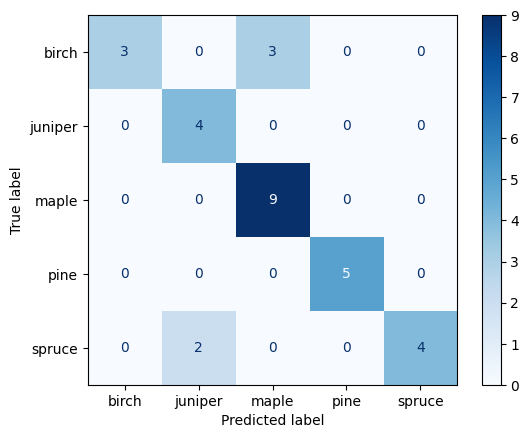

In [48]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Function to get predictions for the entire validation set
def get_all_predictions(model, loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            all_preds.append(predicted.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    # Convert list of arrays to single numpy arrays
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)
    return all_preds, all_labels

# Get predictions and true labels from validation data
preds, labels = get_all_predictions(model, val_loader, device)
# Print the shape of preds and labels
print(f"Number of predictions: {len(preds)}")
print(f"Number of true labels: {len(labels)}")
# Compute the confusion matrix
conf_matrix = confusion_matrix(labels, preds)

# Display the confusion matrix
class_names = ['birch', 'juniper', 'maple', 'pine', 'spruce']  # Based on your dataset

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [52]:
import torch
from torchvision.transforms import ToTensor

def predict(image):
    try:
        # Convert the image to a tensor
        if not isinstance(image, torch.Tensor):
            # First, convert the PIL image to a tensor
            transform = ToTensor()
            image = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to device

        with torch.no_grad():
            # Get model output
            output = model(image)

            # Apply softmax to get probabilities for each class
            probabilities = torch.nn.functional.softmax(output, dim=1)

            # Convert probabilities to percentages
            scores = probabilities.squeeze().cpu().numpy() * 100

            # Map scores to class labels
            class_names = train_data.classes  # Automatically gets class names from dataset
            class_scores = {class_names[i]: scores[i] for i in range(len(class_names))}

        # Sort the classes by highest score
        sorted_class_scores = sorted(class_scores.items(), key=lambda item: item[1], reverse=True)

        # Get the class with the highest score
        most_likely_class = sorted_class_scores[0]

        # Format the result to display the class and its score
        result = f"{most_likely_class}"

        return result

    except Exception as e:
        # Return the error message if something goes wrong
        return f"Error: {str(e)}"

## Gradio Interface

In [53]:
# Create the Gradio interface
iface = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Tree Species Classifier",
    description="Upload an image of a tree, and the model will predict the species with confidence scores for each class."
)

# Launch the Gradio app
iface.launch(share=True)

Running on local URL:  http://127.0.0.1:7863
Running on public URL: https://9b3407bf2f3a3a8cde.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## 10. Inference on a Single Image and Logging Results to W&B

In this block, we define a function to perform inference on a single image using the pre-trained model and log the results to **Weights & Biases (W&B)**. This is useful for evaluating the model's performance on individual images and visualizing the results.

### Function: `infer_and_log()`

- **Loading and Preprocessing**: 
    - **`Image.open(image_path).convert('RGB')`**: Opens the image from the given path and converts it to an RGB format (3-channel).
    - **`transform(image)`**: Applies the transformation (e.g., resizing, tensor conversion) to the image, similar to how we transformed the training and validation images.
    - **`.unsqueeze(0)`**: Adds a batch dimension to the image tensor, as the model expects input in batches.
    - The image tensor is then moved to the specified device (GPU or CPU) using **`.to(device)`**.

- **Inference**:
    - **`model.eval()`**: The model is set to evaluation mode to disable any training-specific operations.
    - **`torch.no_grad()`**: Disables gradient calculations to save memory and speed up inference.
    - The model processes the image, and the predicted class is obtained by finding the index of the highest output score using **`.max(1)`**.
    - The predicted class is then mapped to its corresponding label using the **`class_names`** list.

- **Logging to Weights & Biases**:
    - **`wandb.log()`**: Logs the original input image along with the predicted class to **W&B** for easy tracking and visualization.
    - **`wandb.Image()`**: This function is used to log the input image along with a caption showing the predicted class.

### Example Usage

- **`class_names`**: The list of class names for the Rock, Paper, Scissors dataset (`['paper', 'rock', 'scissors']`).
- **Image Path**: The path to a test image (e.g., `'rps-test-set/rock/testrock01-00.png'`).
- **Inference and Logging**: The `infer_and_log()` function is called, which performs inference on the test image and logs the results to **W&B**.

The predicted class is then printed to the console to verify the result.

By using this function, you can easily evaluate the model's predictions on individual images and track those predictions through **Weights & Biases** for better analysis and visualization.


In [ ]:
from PIL import Image
import torch
import wandb

# Function to perform inference on a single image and log results to W&B
def infer_and_log(model, image_path, transform, device, class_names):
    # Load and preprocess the image
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension

    # Put the model in evaluation mode
    model.eval()

    # Run inference
    with torch.no_grad():
        outputs = model(image_tensor)
        _, predicted = outputs.max(1)
        predicted_class = class_names[predicted.item()]
    
    # Log the input image and the prediction to W&B
    wandb.log({
        "Image": wandb.Image(image, caption=f"Predicted: {predicted_class}"),
        "Prediction": predicted_class
    })

    return predicted_class

# Example usage
# Assuming class_names = ['paper', 'rock', 'scissors']
class_names = ['paper', 'rock', 'scissors']

# Path to the test image
image_path = 'rps-test-set/rock/testrock01-00.png'

# Run inference and log results to W&B
predicted_class = infer_and_log(model, image_path, transform, device, class_names)
print(f'Predicted class: {predicted_class}')
